In [2]:
import cv2
import numpy as np
from PIL import Image


In [3]:
pil_image = Image.open('sudokubig.jpg').convert('RGB') 
open_cv_image = np.array(pil_image) 

In [4]:
sud = cv2.cvtColor(open_cv_image,cv2.COLOR_BGR2GRAY)

In [5]:
sud_blur = cv2.GaussianBlur(sud, (7, 7), 3)

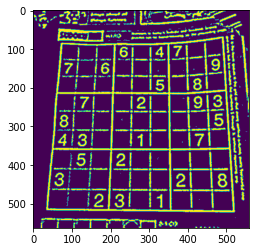

In [22]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(ad_thr)
plt.show()

In [7]:
ad_thr = cv2.adaptiveThreshold(sud_blur, 255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)
# thresh = cv2.bitwise_not(thresh)

In [8]:
ad_thr = cv2.bitwise_not(ad_thr)

In [32]:
# cv2.imshow("Puzzle Thresh", ad_thr)
# cv2.waitKey(0)

In [11]:
cnts = cv2.findContours(ad_thr.copy(), cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)

In [18]:
!pip install imutils

  Created wheel for imutils: filename=imutils-0.5.4-py3-none-any.whl size=25860 sha256=402b88fa039fb3a2f7939021dd2eab3731b9f824bc91c4122f5a4623e12279c9
  Stored in directory: /home/antoniosf/.cache/pip/wheels/59/1b/52/0dea905f8278d5514dc4d0be5e251967f8681670cadd3dca89
Successfully built imutils


In [19]:
from imutils.perspective import four_point_transform
import imutils
cnts = imutils.grab_contours(cnts)

In [23]:
cnts = sorted(cnts, key=cv2.contourArea, reverse=True)

In [24]:
puzzleCnt = None

In [30]:
for c in cnts:
    # approximate the contour
    peri = cv2.arcLength(c, True)
    approx = cv2.approxPolyDP(c, 0.02 * peri, True)
    if len(approx) == 4:
        puzzleCnt = approx
        break